In [180]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# read in RAND dataset
file = 'gtmsa_practicum_datasets/rand_hcris_cy_hosp_a_2020_08_01.csv'
rand = pd.read_csv(file, dtype ='str')

rand.rename(columns = {'Medicare provider number [prvdr_num]':'Medicare Provider Number'},inplace=True)



In [3]:
# read in detailed_data dataset
main_data = pd.read_excel('gtmsa_practicum_datasets/Detailed_Data.xlsx',
                        sheet_name='Table 1. Hospitals',skiprows=16,dtype=str)
main_data.columns=main_data.columns.str.replace('\n',' ')

In [39]:
# read in OPPS dataset from 2015-2017
def load_OPPS_Provider_Data(p):
    files = ['MUP_OHP_R19_P04_V10_D15_APC_Provider.xlsx',
             'MUP_OHP_R19_P04_V10_D16_APC_Provider.xlsx',
             'MUP_OHP_R19_P04_V10_D17_APC_Provider.xlsx']
    df = pd.DataFrame([])
    for index,file in enumerate(files):
        db = pd.read_excel(p+file,skiprows=5,dtype=str)
        db['year'] = 2015+index
        db.columns=db.columns.str.replace('\n',' ') 
        df = df.append(db)
    return df
path1 = 'gtmsa_practicum_datasets/OPPS_charge_data/'
opps = load_OPPS_Provider_Data(path1)


In [5]:
# read in IPPS dataset from 2015-2017
def load_IPPS_Provider_Data(p):
    files = ['Medicare_Provider_Charge_Inpatient_DRGALL_FY2015.csv',
             'Medicare_Provider_Charge_Inpatient_DRGALL_FY2016.csv',
             'Medicare_Provider_Charge_Inpatient_DRGALL_FY2017.csv']
    df = pd.DataFrame([])
    for index,file in enumerate(files):
        db = pd.read_csv(p+file,dtype=str)
        db['year'] = 2015+index
        db.columns=db.columns.str.replace('\n',' ') 
        df = df.append(db)
    return df
path2 = 'gtmsa_practicum_datasets/Medicare_Provider_Charge_Inpatient_DRG/'
ipps = load_IPPS_Provider_Data(path2)


In [71]:
print(opps.shape)
print(ipps.shape)
print(main_data.shape)

(103328, 18)
(595484, 14)
(1598, 22)


In [107]:
# OPPS data manipulation
print(opps.columns.values)
#opps['Comprehensive APC Services']
# convert to integer
opps['Average Medicare Allowed Amount'] = pd.to_numeric(opps['Average Medicare Allowed Amount'])
opps['Comprehensive APC Services'] = pd.to_numeric(opps['Comprehensive APC Services'])
# calculate Total Medicare Payment Amount for OPPS
opps['Medicare Allowed Amount'] = opps['Average Medicare Allowed Amount'] * opps['Comprehensive APC Services']/1000000

['Provider ID' 'Provider Name' 'Provider Street Address' 'Provider City'
 'Provider State' 'Provider Zip Code'
 'Provider Hospital Referral Region (HRR)' 'APC' 'APC Description'
 'Beneficiaries' 'Comprehensive APC Services'
 'Average Estimated Total Submitted Charges'
 'Average Medicare Allowed Amount' 'Average Medicare Payment Amount'
 'Outlier Comprehensive APC Services' 'Average Medicare Outlier Amount'
 'year' 'Medicare Allowed Amount']


In [108]:
# IPPS data manipulation
print(ipps.columns.values)
# convert to integer
ipps['Average Total Payments'] = ipps['Average Total Payments'].replace('[\$,]', '', regex=True).astype(float)
#ipps['Average Total Payments'] = pd.to_numeric(ipps['Average Total Payments'])
ipps['Total Discharges'] = ipps['Total Discharges'].replace(',', '', regex=True).astype(float)
# calculate Total Medicare Payment Amount for OPPS
ipps['Total Payments'] = ipps['Average Total Payments'] * ipps['Total Discharges']/1000000

['DRG Definition' 'Provider Id' 'Provider Name' 'Provider Street Address'
 'Provider City' 'Provider State' 'Provider Zip Code'
 'Hospital Referral Region (HRR) Description' 'Total Discharges'
 'Average Covered Charges' 'Average Total Payments'
 'Average Medicare Payments' 'year' 'Total Payments']


In [109]:
#opps.head(n= 4)
ipps.head(n=5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,year,Total Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,11.0,1014783.45,171081.18,141193.91,2015,1.881893
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,28.0,382051,194081.39,167511.96,2015,5.434279
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50025,UNIVERSITY OF CALIFORNIA SAN DIEGO MEDICAL CENTER,200 WEST ARBOR DRIVE,SAN DIEGO,CA,92103,CA - San Diego,21.0,971881.48,324050.71,294419.62,2015,6.805065
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50100,SHARP MEMORIAL HOSPITAL,7901 FROST ST,SAN DIEGO,CA,92123,CA - San Diego,18.0,1517857.61,257177.33,233532.83,2015,4.629192
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50108,"SUTTER MEDICAL CENTER, SACRAMENTO",2825 CAPITOL AVENUE,SACRAMENTO,CA,95816,CA - Sacramento,17.0,1470341.06,346150.12,338472,2015,5.884552


In [110]:
main_data.head(n=3)

,Medicare Provider Number,Hospital Name,Street Address,City,State,Zip Code,"Hospital System or, if Independent, IPPS/CAH",Is Hospital a Critical Access Hospital (Y/N)?,"Hospital Compare 5-Star Rating (October 2018, N/A = Not Available)",Number of Outpatient Services,...,Relative Price for Outpatient Services,Standardized Price per Outpatient Service,Number of Inpatient Stays,Total Private Allowed Amount for Inpatient Services ($ Millions),Simulated Medicare Allowed Amount for Inpatient Services ($ Millions),Relative Price for Inpatient Services,Standardized Price per Inpatient Stay,Total Private Allowed Amount for Inpatient and Outpatient Services ($ Millions),Simulated Medicare Allowed Amount for Inpatient and Outpatient Services ($ Millions),Relative Price for Inpatient and Outpatient Services
0,060001,North Colorado\nMedical Center,1801 16th Street,Greeley,CO,80631,Banner Health,N,4,31378,...,407,305.04,1679,43.9,15.8,277,19034,99,29.4,337
1,060003,Longmont United\nHospital,1950 Mountain View\nAvenue,Longmont,CO,80501,Catholic Health\nInitiatives,N,4,21771,...,418,309.8,1658,31.5,11.6,271,18499,66.4,20,332
2,060004,Platte Valley Medical\nCenter,1600 Prairie Center\nParkway,Brighton,CO,80601,SCL Health,N,4,15270,...,467,347.59,696,12.8,5,256,16861,39.2,10.7,368


In [111]:
# Sum all charge for every hospital for both OPPS and IPPS
opps_uniq = opps.groupby('Provider ID').agg({'Medicare Allowed Amount':'sum', 'Provider Name':'first', 'Provider Street Address':'first'
                                            , 'Provider City':'first', 'Provider State':'first', 'Provider Zip Code':'first'})
ipps_uniq = ipps.groupby('Provider Id').agg({'Total Payments':'sum', 'Provider Name':'first', 'Provider Street Address':'first'
                                            , 'Provider City':'first', 'Provider State':'first', 'Provider Zip Code':'first'})
ipps_uniq.reset_index(inplace=True)
opps_uniq.reset_index(inplace=True)
print(opps_uniq.shape)
print(ipps_uniq.shape)

(3245, 7)
(3868, 7)


In [112]:
# number of unique labelled hospital
print(main_data['Medicare Provider Number'].nunique())
# number of unique hospital in IPPS and OPPS
print(ipps['Provider Id'].nunique())
print(opps['Provider ID'].nunique())

1598
3868
3245


In [137]:
opps_uniq.head(n=5)

,Provider ID,Medicare Allowed Amount,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code
0,100001,13.658796,Uf Health Jacksonville,655 W 8th St,Jacksonville,FL,32209
1,100002,29.696185,Bethesda Hospital East,2815 S Seacrest Blvd,Boynton Beach,FL,33435
2,100006,55.555147,Orlando Health,52 W Underwood St,Orlando,FL,32806
3,100007,120.478663,Florida Hospital,601 E Rollins St,Orlando,FL,32803
4,100008,22.436393,Baptist Hospital Of Miami,8900 N Kendall Dr,Miami,FL,33176


In [131]:
# merge IPPS data with main data
df = pd.merge(ipps_uniq,main_data, how='outer',left_on='Provider Id',right_on='Medicare Provider Number')
print(df.shape)

(4150, 29)


In [143]:
# fill in missing value for Medicare IPPS from IPPS dataset
df['Simulated Medicare Allowed Amount for Inpatient Services ($ Millions)'] = np.where(df['Simulated Medicare Allowed Amount for Inpatient Services ($ Millions)'] == 'nan', df['Total Payments'], df['Simulated Medicare Allowed Amount for Inpatient Services ($ Millions)'])
df['Simulated Medicare Allowed Amount for Inpatient Services ($ Millions)'].fillna(df['Total Payments'],inplace=True)
df['Medicare Provider Number'].fillna(df['Provider Id'],inplace=True)
#df.head(n=5)
df.to_csv('file1.csv')
# number of hospital without label in main data but no info in IPPS datasets
#np.sum(df['Simulated Medicare Allowed Amount for Inpatient Services ($ Millions)'].isnull())

In [144]:
# merge OPPS data with main data
df2 = pd.merge(opps_uniq,df, how='outer',left_on='Provider ID',right_on='Medicare Provider Number')
print(df2.shape)
df2.head(n=5)

(4243, 36)


,Provider ID,Medicare Allowed Amount,Provider Name_x,Provider Street Address_x,Provider City_x,Provider State_x,Provider Zip Code_x,Provider Id,Total Payments,Provider Name_y,...,Relative Price for Outpatient Services,Standardized Price per Outpatient Service,Number of Inpatient Stays,Total Private Allowed Amount for Inpatient Services ($ Millions),Simulated Medicare Allowed Amount for Inpatient Services ($ Millions),Relative Price for Inpatient Services,Standardized Price per Inpatient Stay,Total Private Allowed Amount for Inpatient and Outpatient Services ($ Millions),Simulated Medicare Allowed Amount for Inpatient and Outpatient Services ($ Millions),Relative Price for Inpatient and Outpatient Services
0,100001,13.658796,Uf Health Jacksonville,655 W 8th St,Jacksonville,FL,32209,100001,200.137678,UF HEALTH JACKSONVILLE,...,389,271.28,nan,nan,200.138,nan,nan,nan,nan,nan
1,100002,29.696185,Bethesda Hospital East,2815 S Seacrest Blvd,Boynton Beach,FL,33435,100002,160.427384,BETHESDA HOSPITAL EAST,...,173,123.54,444,4.8,3.7,131,8635,7.8,5.4,144
2,100006,55.555147,Orlando Health,52 W Underwood St,Orlando,FL,32806,100006,455.955546,ORLANDO HEALTH,...,441,300.66,nan,nan,455.956,nan,nan,nan,nan,nan
3,100007,120.478663,Florida Hospital,601 E Rollins St,Orlando,FL,32803,100007,1397.345745,FLORIDA HOSPITAL,...,487,338.03,24,0.5,0.2,250,15884,0.9,0.3,314
4,100008,22.436393,Baptist Hospital Of Miami,8900 N Kendall Dr,Miami,FL,33176,100008,220.420860,BAPTIST HOSPITAL OF MIAMI,...,395,278.51,nan,nan,220.421,nan,nan,nan,nan,nan


In [147]:
# fill in missing value for Medicare OPPS from OPPS dataset
df2['Simulated Medicare Allowed Amount for Outpatient Services ($ Millions)'] = np.where(df2['Simulated Medicare Allowed Amount for Outpatient Services ($ Millions)'] == 'nan', df2['Medicare Allowed Amount'], df2['Simulated Medicare Allowed Amount for Outpatient Services ($ Millions)'])
df2['Simulated Medicare Allowed Amount for Outpatient Services ($ Millions)'].fillna(df2['Medicare Allowed Amount'],inplace=True)
df2['Medicare Provider Number'].fillna(df2['Provider ID'],inplace=True)
df2.head(n=5)
df2.to_csv('file2.csv')
# number of hospital without label in main data but no info in OPPS datasets
#np.sum(df2['Simulated Medicare Allowed Amount for Outpatient Services ($ Millions)'].isnull())

In [182]:
# train and test main dataset
main_data_labeled = main_data[main_data.iloc[:,-1]!='nan']
le = LabelEncoder()
main_data_labeled = main_data_labeled.apply(le.fit_transform)
X = main_data_labeled.iloc[:,:-1]
y = main_data_labeled.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [191]:
d = {'col1':y_test,'col2':y_pred}
test = pd.DataFrame(data = d)

In [ ]:
# count number of hospitals that has relative price for inpatient and outpatient services value in main dataset
np.sum(main_data['Relative Price for Inpatient and Outpatient Services']!='nan')

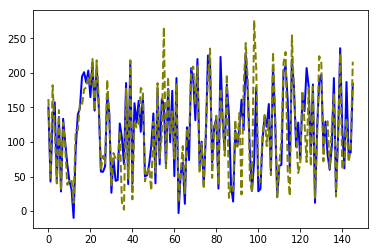

In [198]:
x= range(0,len(y_pred))
plt.plot(x, y_pred, marker='', color='blue', linewidth=2)
plt.plot(x, y_test, marker='', color='olive', linewidth=2,linestyle='dashed', label="toto")